In [1]:
import cv2
import os



class SIFT:
    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path)

    def drawKeypoints(self):
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        kp = sift.detect(gray, None)
        img = cv2.drawKeypoints(gray, kp, self.image)
        cv2.imwrite(os.path.join("siftpoints.jpg"), img)

    def match(self, image_src, image_dest):
        img1 = cv2.imread(image_src)
        img2 = cv2.imread(image_dest)

        # convert images to grayscale
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        # create SIFT object
        sift = cv2.xfeatures2d.SIFT_create()
        # detect SIFT features in both images
        keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
        keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

        # create feature matcher
        bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

        # match descriptors of both images
        matches = bf.match(descriptors_1, descriptors_2)
        matches = sorted(matches, key=lambda x: x.distance)
        # draw first 50 matches
        matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:150], img2, flags=2)
        # save the image
        cv2.imwrite(os.path.join("matched_imaged.jpg"), matched_img)

In [2]:
# # sift feature detection
image_path_src = os.path.join("test.jpg")
sift_obj = SIFT(image_path_src)
sift_obj.drawKeypoints()
sift_obj.match(image_path_src, image_path_src)

In [3]:
import matplotlib.pyplot as plt
def plt_imshow(image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.grid(False)
	plt.show()

In [4]:
image0 = cv2.imread("test.jpg")
image1 = cv2.imread("siftpoints.jpg")
image2 = cv2.imread("matched_imaged.jpg")

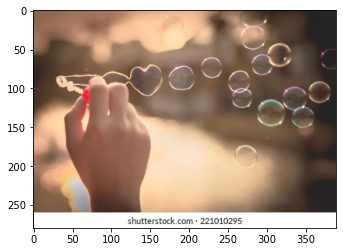

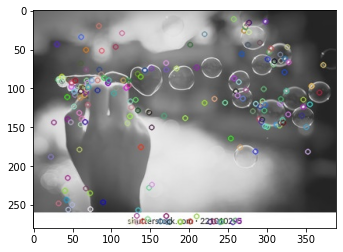

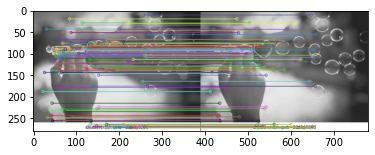

In [5]:
plt_imshow(image0)
plt_imshow(image1)
plt_imshow(image2)
